# <font color = "darkblue"> Ecuaciones Diferenciales Parciales (EDPs) </font>


**Todas las familias felices se parecen entre sí, pero cada familia infeliz es infeliz a su manera**, es una metáfora útil para el cálculo de ecuaciones deferenciales ordinarias (ODEs) en comparación con las ecuaciones diferenciales parciales (PDEs).


Las ecuaciones diferenciales ordinarias son una familia feliz; tal vez no se parecen entre sí, pero, al menos, podemos escribirlas en una sola forma general $\mathbf{y^{\prime}} = \mathbf{f}(t, \mathbf{y})$.

Sin embargo, las ecuaciones diferenciales parciales son una colección enorme y variada de problemas, cada uno infeliz a su manera, por ejemplo, se pueden clasificar en **ecuaciones elípticas, parabólicas e hiperbólicas**, pero este es solo el primer paso en un largo viaje (PDE no lineales, o cuasilineales).

Afortunadamante, sin embargo, es posible destilar una pequeña cantidad de herramientas que permiten un tratamiento numérico bien informado de varias ecuacieones importantes y forman una base sólida para la comprensión del tema en su conjunto. 

**Una de esas herramientas es la teoría clásica de las diferencias finitas.** La idea principal en el cálculo de las diferencias finitas es reemplazar las derivadas con combinaciones lineales de valores de funciones discretas. 

##  <font color = "darkblue"> Esquemas de Diferencias Finitas </font>

###  <font color = "darkblue"> Diferencias Dinitas </font>

###  <font color = "darkblue"> The five-point formula for   $\nabla$$^2 u = f$ </font>

Una de las **ecuaciones diferenciales parciales de tipo elípticas** (ecuaciones de estado estacionario) más importante es la ecuación de $Poisson$ 

$$\nabla^2 u = f, \qquad (x,y) \in  \Omega \qquad \qquad\qquad (1) $$
donde 

$$ \nabla^2 = \frac{\partial^2}{\partial^2 x} + \frac{\partial^2}{\partial^2 y}$$

$f = f(x,y)$ es una función continua conocida y el dominio $\Omega$ $\subset$ $\mathbb{R}^2$ está acotado.

Su solución debe de ir acompañada de una condición de contorno o frontera. Asumiendo la condición de Dirichlet, a saber, que
$$u(x,y) = \phi(x,y), \qquad (x,y) \in \partial\Omega $$

**La implementación de diferencias finitas siempre comienza al generar una malla o cuadrícula en el dominio de interés**. En este caso, imponiendo a $\Omega$ una malla cuadrada, con un espaciado igual a $\Delta$x en ambas direcciones espaciales. En otras palabras, elegimos $\Delta$x$>$0, $(x_0, y_0) \in \Omega$ y dejamos que $\Omega_{\Delta x}$ sea el conjunto de todos los puntos de la forma $(x_0 + k\Delta x, y_0 + l\Delta x)$ que residen en $\Omega$

<img src="ComputacionalGrid.png" width=280 height=280>
$\qquad$$\qquad$$\qquad$$\qquad$$\qquad$$\qquad$$\qquad$$\qquad$ $\qquad$Computacional Grid

denotamos a $u_{k,l}$ como la aproximación a la solución $u(x_0 + k\Delta x, y_0 + l\Delta x)$ a la ecuación de Poisson en el punto de la malla $(k,l)$.

Nuestro primer esquema de diferencias finitas aproxima a $\nabla ^2 $ en un punto de la malla $(k,l)$ como una combinación lineal de los cinco valores $u_{k,l}, u_{k\pm 1, l}, u_{k, l \pm 1}$. 
Por tanto, para cada punto interno de la malla: 



<img src="ComputationalStencil.png" width=280 height=280>
$\qquad$$\qquad$$\qquad$$\qquad$$\qquad$$\qquad$ Computational Stencil o Computational Molecule

Sea $v=(x,y)$, $(x,y)\in \Omega$ 

para cada punto interno de la malla.

$ \left. \frac{\partial^2 v}{\partial x^2}\right| _{x=x_o + k\Delta x \atop y=y_o + l\Delta x } = \frac{1}{(\Delta x)^2} \Delta_{0,x}^2 v_{k,l} + \vartheta((\Delta x)^2) $

$ \left. \frac{\partial^2 v}{\partial y^2}\right| _{x=x_o + k\Delta x \atop y=y_o + l\Delta x } = \frac{1}{(\Delta x)^2} \Delta_{0,y}^2 v_{k,l} + \vartheta((\Delta x)^2) $

donde $v_{k,l}$ es el valor de v en el punto (k,l) de la malla. Aproximamos $\nabla^2$ a orden $\vartheta((\Delta x)^2)$.

Esto motiva el reemplazo de la ecuación de Poisson  por el esquema de diferencia finita de cinco puntos para cada par $(k,l)$ correspondiente a un punto interno de la malla. Por supuesto, $f_{k, l}=f(x_0 + k\Delta x, y_0 + l\Delta x)$. De esta forma, podemos escribir la ecuación anterior como:


### <font color = "black"> $$u_{k-1, l} + u_{k+1, l} + u_{k, l-1} + u_{k, l+1} - 4u_{k,l} = (\Delta x)^2 f_{k,l} \qquad (2)$$  </font>

Esta ecuación dice que cuando tengamos una solución adecuada, será el promedio en los cuatro vecinos más cercanos. Como algoritmo, la ecuación (2) no proporciona una solución directa a la ecuación de Poisson, sino que debe repetirse muchas veces para converger en la solución. **Comenzamos con una conjetura inicial del problema, lo mejoramos barriendo todo el espacio tomando el promedio sobre los vecinos más cercanos en cada nodo, y seguimos repitiendo el proceso hasta que la solución ya no cambie a un cierto nivel de precisión o hasta que la falla sea evidente. Cuando converge, se dice que la suposición inicial se ha relajado en la solución.**


## <font color = "darkblue"> Ejemplo 1 </font>
## <font color = "darkblue"> Ecuación de Laplace $\nabla^2 u = 0$ </font>

El primer ejemplo a considerar, es el caso electrostático en dos dimensiones $\nabla^2 \mathbf{V_{e}}=0$. 

Hay varias formas en que el algoritmo (2) pueda iterarse para convertir las condiciones de contorno en una solución. Su forma más básica es el **método de Jacobi** y es uno en el que los valores potenciales no cambian hasta que se completa un barrido completo del algoritmos (2) en cada punto. 


En este caso particular se tiene que programar: 

$$V_{k,l}^{nuevo} = \frac{1}{4}\left( V_{k-1, l} + V_{k+1, l} + V_{k, l-1} + V_{k, l+1} \right) $$

### <font color = "darkblue"> Potencial cuadrado dentro de una malla cuadrada </font>

Supongamos que tenemos un problema electrostático en el que se tiene un cuadrado de longitud L = 100 a potencial $V=0$. Dentro de este cuadrado se tiene otro de lado L=10 a potnecial V=10 alineado a lo largo del eje del cuadrado exterior. 

<img src="Ejemplo1.pdf" width=280 height=280>
$\qquad$$\qquad$$\qquad$$\qquad$$\qquad$$\qquad$ Representación esquemática del ejemplo 1.

In [1]:
using Plots  
using Interact
include("herramientas.jl")
gr()

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-15076421222633318223\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-8793308144030941096\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-15076421222633318223\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

Plots.GRBackend()

In [2]:
function GeneraMalla(L, deltaX, lx, ly, v0)
    
    ladoCajaX = 0:deltaX:L
    ladoCajaY = 0:deltaX:L
    
    Malla = zeros(length(ladoCajaY), length(ladoCajaX))
    
    for l in 1:length(ladoCajaY)-1
        for k in 1:length(ladoCajaY)-1
            if (lx[1] <= ladoCajaX[k] <= lx[2]) && (ly[1] <= ladoCajaX[l] <= ly[2])
                Malla[l,k] = v0
            else
                continue
            end
        end
    end
    return ladoCajaX, ladoCajaY, Malla
end
            

GeneraMalla (generic function with 1 method)

In [3]:
Lx, Ly, malla = GeneraMalla(100, 1, [40, 60], [40, 60], 10);

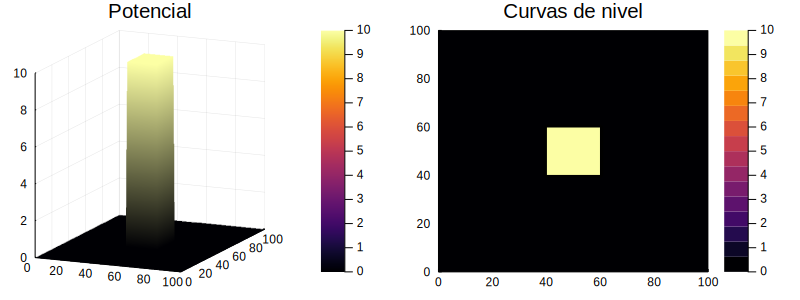

In [4]:
p1 = surface(Lx, Ly, malla,title="Potencial",colorbar=true)
p2 = contourf(Lx, Ly, malla,title="Curvas de nivel")

plot(p1, p2, layout=(1, 2), size=(800, 300), dpi=100)

In [5]:
function relajar(malla, v0)
    for k in 2:length(malla[:,1])-1
        for l in 2:length(malla[1,:])-1
            if malla[k,l] == v0
                continue
            else
                malla[k,l] = 0.25*(malla[k+1, l] + malla[k-1, l] + malla[k, l-1] + malla[k, l+1])
            end
        end
    end
    return malla
end

relajar (generic function with 1 method)

In [6]:
function relajacion(malla, error)
    condicion, iteracion = true, 0
    Sol = []
    push!(Sol, malla)
    
    while condicion == true
        
        malla_anterior = copy(malla)
        malla = relajar(malla, 10)
        diferencia = broadcast(abs, malla_anterior .- malla)
        iteracion += 1
        push!(Sol, malla_anterior)
        
        if maximum(diferencia) >= error
            continue
        else
            condicion = false
        end
    end
    
    return malla, iteracion, Sol
end
        

relajacion (generic function with 1 method)

In [7]:
potencial, Niteraciones , Solucion = relajacion(malla, 1e-5);

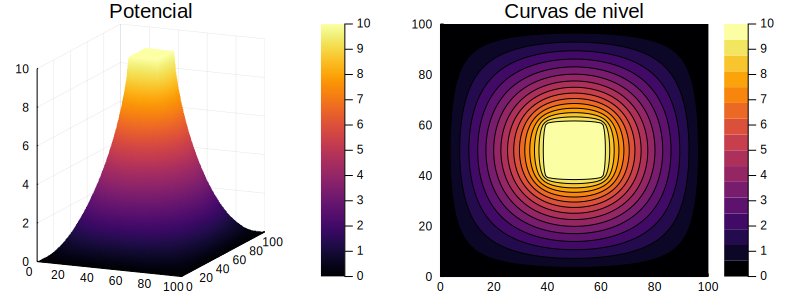

In [37]:
p2 = contourf(Lx, Ly, potencial,title="Curvas de nivel")
p1 = surface(Lx, Ly, potencial,title="Potencial ",colorbar=true)


plot(p1,p2, layout=(1, 2), size=(800, 300), dpi=100)


In [ ]:
anim = @animate for t in 1:600
    p1 = contourf(Lx, Ly, Solucion[t],title="Curvas de nivel")
    p2 = surface(Lx, Ly, Solucion[t],title="Potencial\n Iteracón = $t",colorbar=true)
    

    plot(p2,p1, layout=(1, 2), size=(800, 300), dpi=200)
    end every 1

gif(anim, "Prueba02.gif", fps=60)   

# <font color = "darkblue"> Ejercicio 1 </font>

## <font color = "darkblue"> Potencial circular dentro de una malla cuadrada </font>

Utilizando el esquema anterior, contempla una malla cuadrada, igualmente equiespaciada de lado L = 100 a potencial cero, y dentro de ella un círculo de radio $R_o$=20 a potencial V=10. 

**Resuleve la ecuación de Laplace para este problema electrostático en particular** 